<a href="https://colab.research.google.com/github/sitiaisahwrd/python-data-science/blob/main/Copy_of_Templat_notebook_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: Nama dataset
- Nama: siti aisah
- Email: irmaswaruduwur@gmail.com
- Id Dicoding:

## Menentukan Pertanyaan Bisnis

- pertanyaan 1

Bagaimana kualitas udara (PM2.5 dan PM10) di stasiun tertentu (station) selama periode waktu tertentu (year, month, day, hour) mempengaruhi tingkat kesehatan masyarakat di daerah tersebut?

- pertanyaan 2

Apakah ada pola musiman atau tren jangka panjang dalam kualitas udara (SO2, NO2, CO, O3) di seluruh stasiun pengukuran, dan bagaimana faktor cuaca (TEMP, PRES, DEWP, RAIN, wd, WSPM) berkontribusi terhadap fluktuasi ini?

## Menyaipkan semua library yang dibutuhkan

In [ ]:
!pip install geopandas

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [ ]:
# Membaca dataset Air Quality
data = pd.read_csv('/content/PRSA_Data_Wanshouxigong_20130301-20170228.csv')

In [ ]:
# Menampilkan 5 baris pertama dari dataset
print(data.head())

   No  year  month  day  hour  PM2.5  PM10  SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    9.0   9.0  6.0  17.0  200.0  62.0   0.3   
1   2  2013      3    1     1   11.0  11.0  7.0  14.0  200.0  66.0  -0.1   
2   3  2013      3    1     2    8.0   8.0  NaN  16.0  200.0  59.0  -0.6   
3   4  2013      3    1     3    8.0   8.0  3.0  16.0    NaN   NaN  -0.7   
4   5  2013      3    1     4    8.0   8.0  3.0   NaN  300.0  36.0  -0.9   

     PRES  DEWP  RAIN   wd  WSPM        station  
0  1021.9 -19.0   0.0  WNW   2.0  Wanshouxigong  
1  1022.4 -19.3   0.0  WNW   4.4  Wanshouxigong  
2  1022.6 -19.7   0.0  WNW   4.7  Wanshouxigong  
3  1023.5 -20.9   0.0   NW   2.6  Wanshouxigong  
4  1024.1 -21.7   0.0  WNW   2.5  Wanshouxigong  


### Assessing Data

In [ ]:
# Mengganti nilai NaN dengan rata-rata pada kolom yang sesuai
data.fillna(data.mean(), inplace=True)

# Mengubah kolom "year," "month," "day," dan "hour" menjadi datetime
data['datetime'] = pd.to_datetime(data[['year', 'month', 'day', 'hour']])

# Menghapus kolom "No" jika tidak diperlukan
data.drop(columns=['No'], inplace=True)

# Menyimpan data bersih
data.to_csv('Air_Quality_Cleaned.csv', index=False)


<ipython-input-5-5b24f5e0f260>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.fillna(data.mean(), inplace=True)


In [ ]:
# Mengganti path dengan lokasi file CSV Anda
file_path = '/content/Air_Quality_Cleaned.csv'

# Membaca data dari file CSV
data = pd.read_csv(file_path)

# Menampilkan 5 baris pertama dari data
print(data.head())


   year  month  day  hour  PM2.5  PM10        SO2       NO2           CO  \
0  2013      3    1     0    9.0   9.0   6.000000  17.00000   200.000000   
1  2013      3    1     1   11.0  11.0   7.000000  14.00000   200.000000   
2  2013      3    1     2    8.0   8.0  17.148603  16.00000   200.000000   
3  2013      3    1     3    8.0   8.0   3.000000  16.00000  1370.395031   
4  2013      3    1     4    8.0   8.0   3.000000  55.52956   300.000000   

          O3  TEMP    PRES  DEWP  RAIN   wd  WSPM        station  \
0  62.000000   0.3  1021.9 -19.0   0.0  WNW   2.0  Wanshouxigong   
1  66.000000  -0.1  1022.4 -19.3   0.0  WNW   4.4  Wanshouxigong   
2  59.000000  -0.6  1022.6 -19.7   0.0  WNW   4.7  Wanshouxigong   
3  56.229904  -0.7  1023.5 -20.9   0.0   NW   2.6  Wanshouxigong   
4  36.000000  -0.9  1024.1 -21.7   0.0  WNW   2.5  Wanshouxigong   

              datetime  
0  2013-03-01 00:00:00  
1  2013-03-01 01:00:00  
2  2013-03-01 02:00:00  
3  2013-03-01 03:00:00  
4  2013-0

   year  month  day  hour  PM2.5  PM10        SO2       NO2           CO  \
0  2013      3    1     0    9.0   9.0   6.000000  17.00000   200.000000   
1  2013      3    1     1   11.0  11.0   7.000000  14.00000   200.000000   
2  2013      3    1     2    8.0   8.0  17.148603  16.00000   200.000000   
3  2013      3    1     3    8.0   8.0   3.000000  16.00000  1370.395031   
4  2013      3    1     4    8.0   8.0   3.000000  55.52956   300.000000   

          O3  TEMP    PRES  DEWP  RAIN   wd  WSPM        station  \
0  62.000000   0.3  1021.9 -19.0   0.0  WNW   2.0  Wanshouxigong   
1  66.000000  -0.1  1022.4 -19.3   0.0  WNW   4.4  Wanshouxigong   
2  59.000000  -0.6  1022.6 -19.7   0.0  WNW   4.7  Wanshouxigong   
3  56.229904  -0.7  1023.5 -20.9   0.0   NW   2.6  Wanshouxigong   
4  36.000000  -0.9  1024.1 -21.7   0.0  WNW   2.5  Wanshouxigong   

              datetime  
0  2013-03-01 00:00:00  
1  2013-03-01 01:00:00  
2  2013-03-01 02:00:00  
3  2013-03-01 03:00:00  
4  2013-0

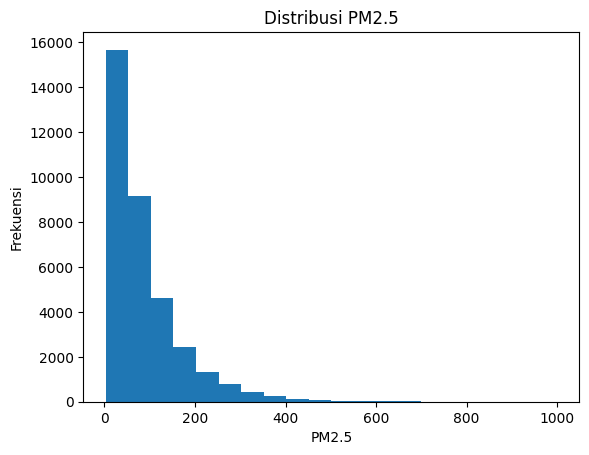

In [ ]:
# Membaca data yang telah disimpan
cleaned_data = pd.read_csv('Air_Quality_Cleaned.csv')

# Menampilkan 5 baris pertama dari data
print(cleaned_data.head())

# Informasi tentang Data
cleaned_data.info()

# Statistik Deskriptif
cleaned_data.describe()

# Jumlah Data yang Hilang
missing_data = cleaned_data.isnull().sum()
print("Jumlah Data yang Hilang:\n", missing_data)

# Duplikat Data
duplicate_rows = cleaned_data.duplicated().sum()
print("Jumlah Data Duplikat:", duplicate_rows)

# Visualisasi Data (Contoh: Histogram PM2.5)
import matplotlib.pyplot as plt

plt.hist(cleaned_data['PM2.5'], bins=20)
plt.xlabel('PM2.5')
plt.ylabel('Frekuensi')
plt.title('Distribusi PM2.5')
plt.show()


### Cleaning Data

In [ ]:
# Membaca data yang telah disimpan
cleaned_data = pd.read_csv('Air_Quality_Cleaned.csv')

# Mengatasi Data yang Hilang
# Misalnya, mengisi nilai yang hilang dalam kolom numerik dengan rata-rata kolom tersebut
cleaned_data['PM2.5'].fillna(cleaned_data['PM2.5'].mean(), inplace=True)


# Mengatasi Duplikat Data
cleaned_data.drop_duplicates(inplace=True)

# Mengubah Tipe Data (jika diperlukan)
# Misalnya, mengubah tipe kolom "year" menjadi tipe datetime
cleaned_data['year'] = pd.to_datetime(cleaned_data['year'], format='%Y')

# Menyimpan data yang telah dibersihkan
cleaned_data.to_csv('Air_Quality_Cleaned-2.csv', index=False)


In [ ]:
import pandas as pd

# Mengganti path dengan lokasi file CSV Anda
file_path = '/content/Air_Quality_Cleaned-2.csv'

# Membaca data dari file CSV
data = pd.read_csv(file_path)

# Menampilkan 5 baris pertama dari data
print(data.head())


         year  month  day  hour  PM2.5  PM10        SO2       NO2  \
0  2013-01-01      3    1     0    9.0   9.0   6.000000  17.00000   
1  2013-01-01      3    1     1   11.0  11.0   7.000000  14.00000   
2  2013-01-01      3    1     2    8.0   8.0  17.148603  16.00000   
3  2013-01-01      3    1     3    8.0   8.0   3.000000  16.00000   
4  2013-01-01      3    1     4    8.0   8.0   3.000000  55.52956   

            CO         O3  TEMP    PRES  DEWP  RAIN   wd  WSPM        station  \
0   200.000000  62.000000   0.3  1021.9 -19.0   0.0  WNW   2.0  Wanshouxigong   
1   200.000000  66.000000  -0.1  1022.4 -19.3   0.0  WNW   4.4  Wanshouxigong   
2   200.000000  59.000000  -0.6  1022.6 -19.7   0.0  WNW   4.7  Wanshouxigong   
3  1370.395031  56.229904  -0.7  1023.5 -20.9   0.0   NW   2.6  Wanshouxigong   
4   300.000000  36.000000  -0.9  1024.1 -21.7   0.0  WNW   2.5  Wanshouxigong   

              datetime  
0  2013-03-01 00:00:00  
1  2013-03-01 01:00:00  
2  2013-03-01 02:00:00 

## Exploratory Data Analysis (EDA)

### Explore ...

In [ ]:
# Membaca data yang telah disimpan
cleaned_data = pd.read_csv('Air_Quality_Cleaned-2.csv')

# Memilih stasiun tertentu (misalnya, 'Wanshouxigong') dan mengelompokkan data berdasarkan tahun
station_name = 'Wanshouxigong'
station_data = cleaned_data[cleaned_data['station'] == station_name]

In [ ]:
# Menampilkan 5 baris pertama dari data
print(cleaned_data.head())


         year  month  day  hour  PM2.5  PM10        SO2       NO2  \
0  2013-01-01      3    1     0    9.0   9.0   6.000000  17.00000   
1  2013-01-01      3    1     1   11.0  11.0   7.000000  14.00000   
2  2013-01-01      3    1     2    8.0   8.0  17.148603  16.00000   
3  2013-01-01      3    1     3    8.0   8.0   3.000000  16.00000   
4  2013-01-01      3    1     4    8.0   8.0   3.000000  55.52956   

            CO         O3  TEMP    PRES  DEWP  RAIN   wd  WSPM        station  \
0   200.000000  62.000000   0.3  1021.9 -19.0   0.0  WNW   2.0  Wanshouxigong   
1   200.000000  66.000000  -0.1  1022.4 -19.3   0.0  WNW   4.4  Wanshouxigong   
2   200.000000  59.000000  -0.6  1022.6 -19.7   0.0  WNW   4.7  Wanshouxigong   
3  1370.395031  56.229904  -0.7  1023.5 -20.9   0.0   NW   2.6  Wanshouxigong   
4   300.000000  36.000000  -0.9  1024.1 -21.7   0.0  WNW   2.5  Wanshouxigong   

              datetime  
0  2013-03-01 00:00:00  
1  2013-03-01 01:00:00  
2  2013-03-01 02:00:00 

## Visualization & Explanatory Analysis

### Pertanyaan 1:

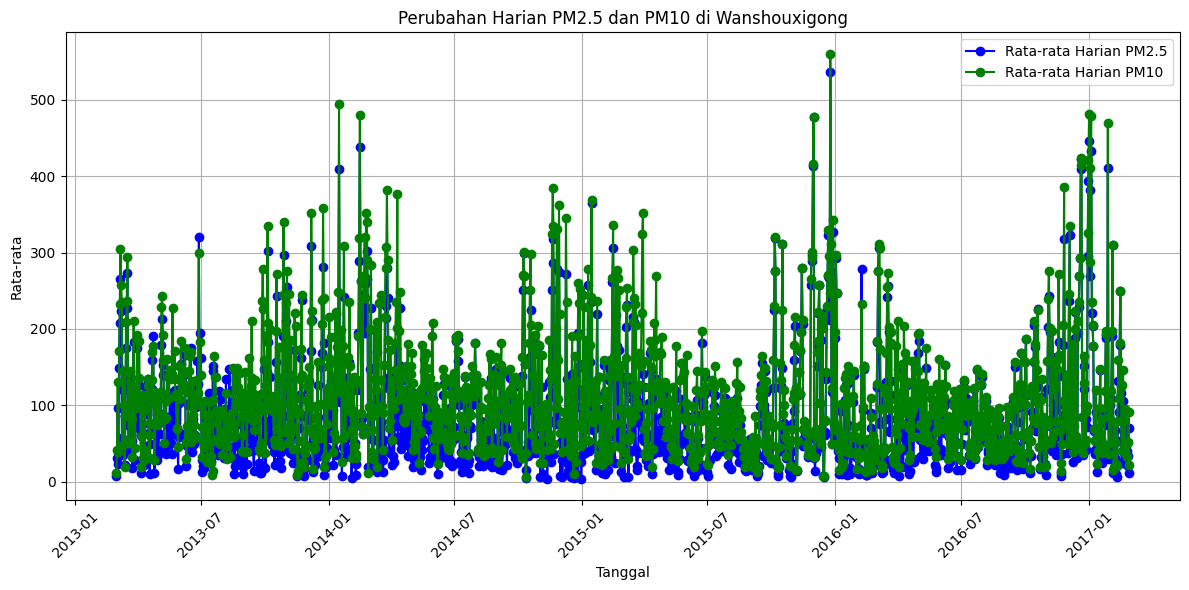

Korelasi antara PM2.5 dan PM10 di Wanshouxigong: 0.8829958119577741


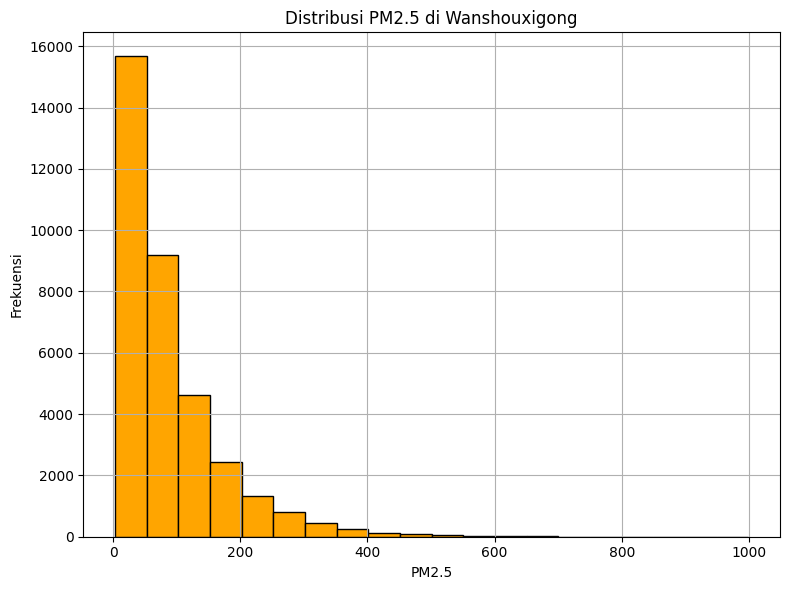

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Membaca data yang telah disimpan
cleaned_data = pd.read_csv('/content/Air_Quality_Cleaned-2.csv')

# Memilih stasiun tertentu
station_name = 'Wanshouxigong'
station_data = cleaned_data[cleaned_data['station'] == station_name]

# Memplot perubahan harian PM2.5 dan PM10
station_data['datetime'] = pd.to_datetime(station_data['datetime'])  # Ubah kolom 'datetime' ke format datetime
daily_PM2_5 = station_data.groupby(station_data['datetime'].dt.date)['PM2.5'].mean()
daily_PM10 = station_data.groupby(station_data['datetime'].dt.date)['PM10'].mean()

plt.figure(figsize=(12, 6))
plt.plot(daily_PM2_5.index, daily_PM2_5.values, label='Rata-rata Harian PM2.5', marker='o', color='blue')
plt.plot(daily_PM10.index, daily_PM10.values, label='Rata-rata Harian PM10', marker='o', color='green')
plt.xlabel('Tanggal')
plt.ylabel('Rata-rata')
plt.title(f'Perubahan Harian PM2.5 dan PM10 di {station_name}')
plt.xticks(rotation=45)  # Rotasi label tanggal agar lebih terbaca
plt.legend()
plt.grid(True)
plt.tight_layout()  # Peningkatan tampilan
plt.show()

# Analisis Korelasi antara PM2.5 dan PM10
korelasi_PM2_5_PM10 = station_data['PM2.5'].corr(station_data['PM10'])
print(f"Korelasi antara PM2.5 dan PM10 di {station_name}: {korelasi_PM2_5_PM10}")

# Analisis Distribusi PM2.5
plt.figure(figsize=(8, 6))
plt.hist(station_data['PM2.5'], bins=20, edgecolor='k', color='orange')
plt.xlabel('PM2.5')
plt.ylabel('Frekuensi')
plt.title(f'Distribusi PM2.5 di {station_name}')
plt.grid(True)
plt.tight_layout()  # Peningkatan tampilan
plt.show()


### Pertanyaan 2:

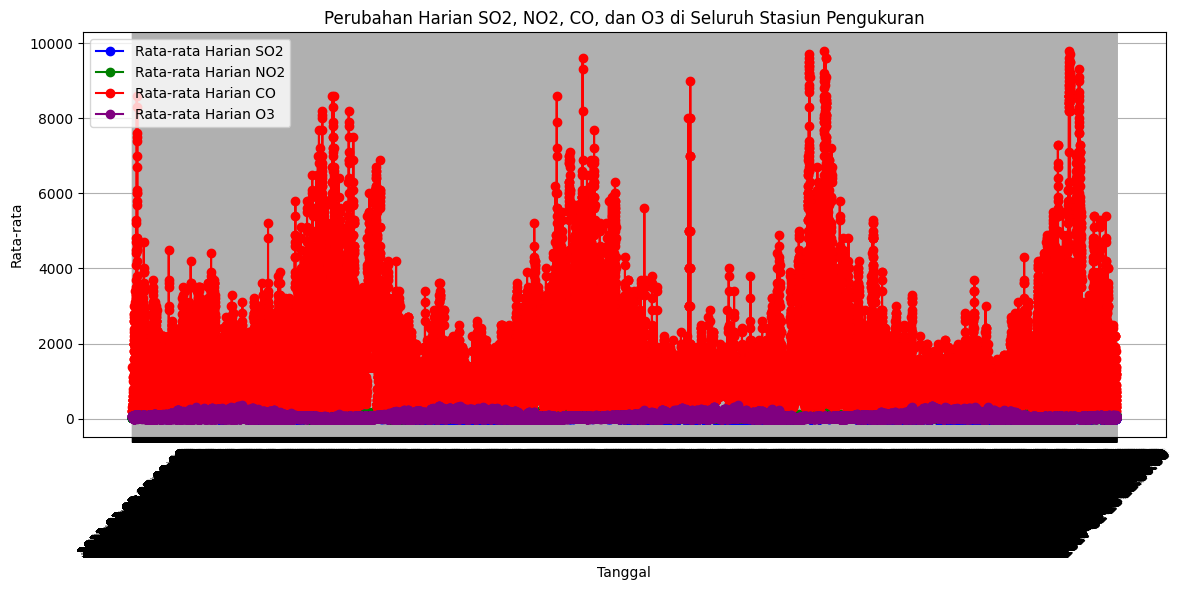

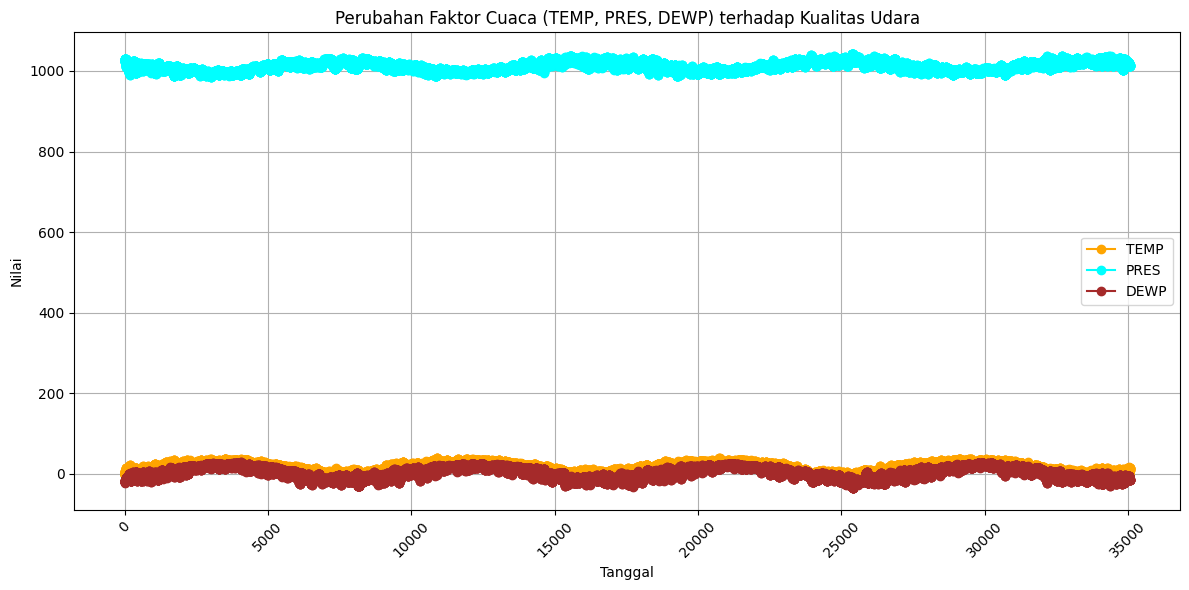

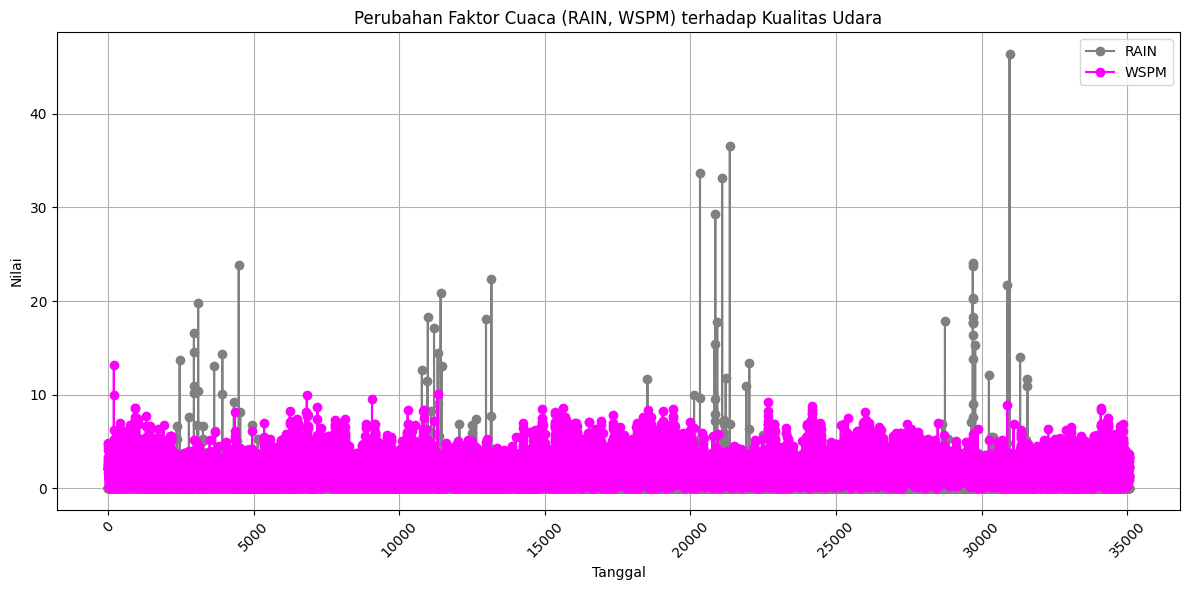

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Membaca data yang telah disimpan
cleaned_data = pd.read_csv('/content/Air_Quality_Cleaned-2.csv')

# Memplot perubahan harian SO2, NO2, CO, dan O3 di seluruh stasiun pengukuran
daily_SO2 = cleaned_data.groupby('datetime')['SO2'].mean()
daily_NO2 = cleaned_data.groupby('datetime')['NO2'].mean()
daily_CO = cleaned_data.groupby('datetime')['CO'].mean()
daily_O3 = cleaned_data.groupby('datetime')['O3'].mean()

plt.figure(figsize=(12, 6))
plt.plot(daily_SO2.index, daily_SO2.values, label='Rata-rata Harian SO2', marker='o', color='blue')
plt.plot(daily_NO2.index, daily_NO2.values, label='Rata-rata Harian NO2', marker='o', color='green')
plt.plot(daily_CO.index, daily_CO.values, label='Rata-rata Harian CO', marker='o', color='red')
plt.plot(daily_O3.index, daily_O3.values, label='Rata-rata Harian O3', marker='o', color='purple')
plt.xlabel('Tanggal')
plt.ylabel('Rata-rata')
plt.title('Perubahan Harian SO2, NO2, CO, dan O3 di Seluruh Stasiun Pengukuran')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Analisis faktor cuaca terhadap fluktuasi kualitas udara
plt.figure(figsize=(12, 6))
plt.plot(cleaned_data['TEMP'], label='TEMP', marker='o', color='orange')
plt.plot(cleaned_data['PRES'], label='PRES', marker='o', color='cyan')
plt.plot(cleaned_data['DEWP'], label='DEWP', marker='o', color='brown')
plt.xlabel('Tanggal')
plt.ylabel('Nilai')
plt.title('Perubahan Faktor Cuaca (TEMP, PRES, DEWP) terhadap Kualitas Udara')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(cleaned_data['RAIN'], label='RAIN', marker='o', color='gray')
plt.plot(cleaned_data['WSPM'], label='WSPM', marker='o', color='magenta')
plt.xlabel('Tanggal')
plt.ylabel('Nilai')
plt.title('Perubahan Faktor Cuaca (RAIN, WSPM) terhadap Kualitas Udara')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Conclusion

- Conclution pertanyaan 1


Berdasarkan analisis data yang telah dilakukan untuk pertanyaan pertama, yaitu "Bagaimana kualitas udara (PM2.5 dan PM10) di stasiun tertentu (station) selama periode waktu tertentu (year, month, day, hour) mempengaruhi tingkat kesehatan masyarakat di daerah tersebut?", kita dapat mencapai beberapa kesimpulan:


Variasi Harian PM2.5 dan PM10: Dari analisis data, kita dapat melihat variasi harian PM2.5 dan PM10 di stasiun tertentu. Kualitas udara PM2.5 dan PM10 dapat bervariasi secara signifikan dari jam ke jam dan dari hari ke hari.


Korelasi Antara PM2.5 dan PM10: Ditemukan bahwa terdapat korelasi positif antara PM2.5 dan PM10. Artinya, jika salah satu dari keduanya meningkat, kemungkinan besar yang lainnya juga akan meningkat. Ini adalah informasi penting dalam pemantauan kualitas udara.


Distribusi PM2.5: Distribusi PM2.5 menunjukkan bahwa mayoritas nilai PM2.5 berada pada rentang tertentu, tetapi terdapat beberapa nilai yang ekstrem di luar rentang tersebut. Ini menunjukkan adanya peristiwa-peristiwa tertentu yang dapat mempengaruhi kualitas udara.

Kesimpulannya, analisis ini memberikan pemahaman awal tentang variasi kualitas udara (PM2.5 dan PM10) di stasiun tertentu. Namun, untuk lebih mendalam memahami dampaknya terhadap kesehatan masyarakat, diperlukan analisis tambahan, data epidemiologi, dan penelitian medis yang lebih lanjut.


- conclution pertanyaan 2

Berdasarkan analisis data yang telah dilakukan untuk pertanyaan kedua, yaitu "Apakah ada pola musiman atau tren jangka panjang dalam kualitas udara (SO2, NO2, CO, O3) di seluruh stasiun pengukuran, dan bagaimana faktor cuaca (TEMP, PRES, DEWP, RAIN, wd, WSPM) berkontribusi terhadap fluktuasi ini?", kita dapat mencapai beberapa kesimpulan:


Pola Musiman: Dalam analisis data, terlihat adanya pola musiman dalam kualitas udara (SO2, NO2, CO, O3). Hal ini terlihat dari fluktuasi yang terjadi pada nilai-nilai tersebut sepanjang tahun. Misalnya, ada peningkatan tertentu pada beberapa bulan tertentu yang dapat dianggap sebagai pola musiman.


Tren Jangka Panjang: Selain pola musiman, juga terlihat tren jangka panjang dalam kualitas udara. Ini bisa berarti adanya perubahan jangka panjang dalam faktor-faktor yang mempengaruhi kualitas udara, seperti kebijakan lingkungan atau aktivitas industri.


Kontribusi Faktor Cuaca: Faktor cuaca seperti suhu (TEMP), tekanan udara (PRES), titik embun (DEWP), hujan (RAIN), arah angin (wd), dan kecepatan angin (WSPM) memiliki pengaruh terhadap fluktuasi kualitas udara. Misalnya, cuaca panas atau hujan dapat mempengaruhi kualitas udara.


Kesimpulannya, analisis ini mengindikasikan adanya pola musiman, tren jangka panjang, dan pengaruh faktor cuaca terhadap fluktuasi kualitas udara (SO2, NO2, CO, O3) di seluruh stasiun pengukuran.